In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.icm_framework_v2 import ICMFrameworkV2
from utils.reliability_visualizer import ReliabilityVisualizer

###########################################################
# Load Classifier and Data
###########################################################
pipeline = joblib.load('pipeline_classifier.pkl')
training_data = pd.read_csv("./data_train.csv")

y_train = training_data['SOURCE'].map({'out': 0, 'in': 1})
X_train = training_data.drop(columns=['SOURCE'])

X_train_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train)

In [2]:
###########################################################
# Initialize ICM (Interpretable Confidence Measures)
###########################################################
##################3 
### Adjust
k_neighbors = 9  # Number of nearest neighbors
icm = ICMFrameworkV2(X_train_preprocessed, y_train.values, k_neighbors=k_neighbors)

In [3]:
###########################################################
# Classification and Reliability
###########################################################
def classify_and_calculate_reliability_icm(new_data, pipeline, icm):
    """
    Predicts the class and calculates a reliability score for a new instance using ICM Framework.

    Parameters:
    - new_data (pd.DataFrame): DataFrame with the same columns as training data.
    - pipeline (Pipeline): The loaded pipeline for preprocessing and classification.
    - icm (ICMFramework): Instance of the ICMFramework initialized with training data and labels.

    Returns:
    - dict: Contains prediction, reliability score, and neighbors used.
    """
    # Preprocess the data
    new_data_preprocessed = pipeline.named_steps['preprocessor'].transform(new_data)
    
    # Predict the label
    predicted_label = pipeline.named_steps['classifier'].predict(new_data_preprocessed)[0]
    
    # Compute the reliability score
    reliability_score = icm.compute_confidence(new_data_preprocessed[0], predicted_label)
    
    return {
        "predicted_label": predicted_label,
        "reliability_score": reliability_score
    }

In [4]:
###########################################################
# Load and Test with Unseen Data
###########################################################
validation_data = pd.read_csv("./data_validation.csv")
validation_data['SOURCE'] = validation_data['SOURCE'].map({'out': 0, 'in': 1})
# first_500_instances = validation_data.iloc[:500]

results = []
# for _, instance in first_500_instances.iterrows():
for _, instance in validation_data.iterrows():
    true_label = instance['SOURCE']
    instance_df = pd.DataFrame([instance.drop(labels=['SOURCE'])])
    result = classify_and_calculate_reliability_icm(
        instance_df,
        pipeline,
        icm
    )
    result['true_label'] = true_label
    results.append(result)

results_df = pd.DataFrame(results)
# results_df

Sigma:
0.007748388432055307
Sigma:
0.012358419362073035
Sigma:
0.00999306916931705
Sigma:
0.013415731877343077
Sigma:
0.009904832195198963
Sigma:
0.13587719441539012
Sigma:
0.01949780657825245
Sigma:
0.012335603414972638
Sigma:
0.010102174844350546
Sigma:
0.013043497739454353
Sigma:
0.013073807637015872
Sigma:
0.0031906808618707974
Sigma:
0.023532564855888196
Sigma:
0.011387197894562058
Sigma:
0.009953793039568955
Sigma:
0.06645353310518182
Sigma:
0.0057216891076473896
Sigma:
0.021731817161975576
Sigma:
0.005615121244738994
Sigma:
0.017028788567017592
Sigma:
0.004554252410550165
Sigma:
0.020895863493117218
Sigma:
0.0052926982762411725
Sigma:
0.00798939309216814
Sigma:
0.005395567600536485
Sigma:
0.0288313224869272
Sigma:
0.015883667315538193
Sigma:
0.007668462059924415
Sigma:
0.0349192694590573
Sigma:
0.024756666879113418
Sigma:
0.00925337173489473
Sigma:
0.010137958361838948
Sigma:
0.004494342206441039
Sigma:
0.007938896433692512
Sigma:
0.015178732724616898
Sigma:
0.008037569395090486

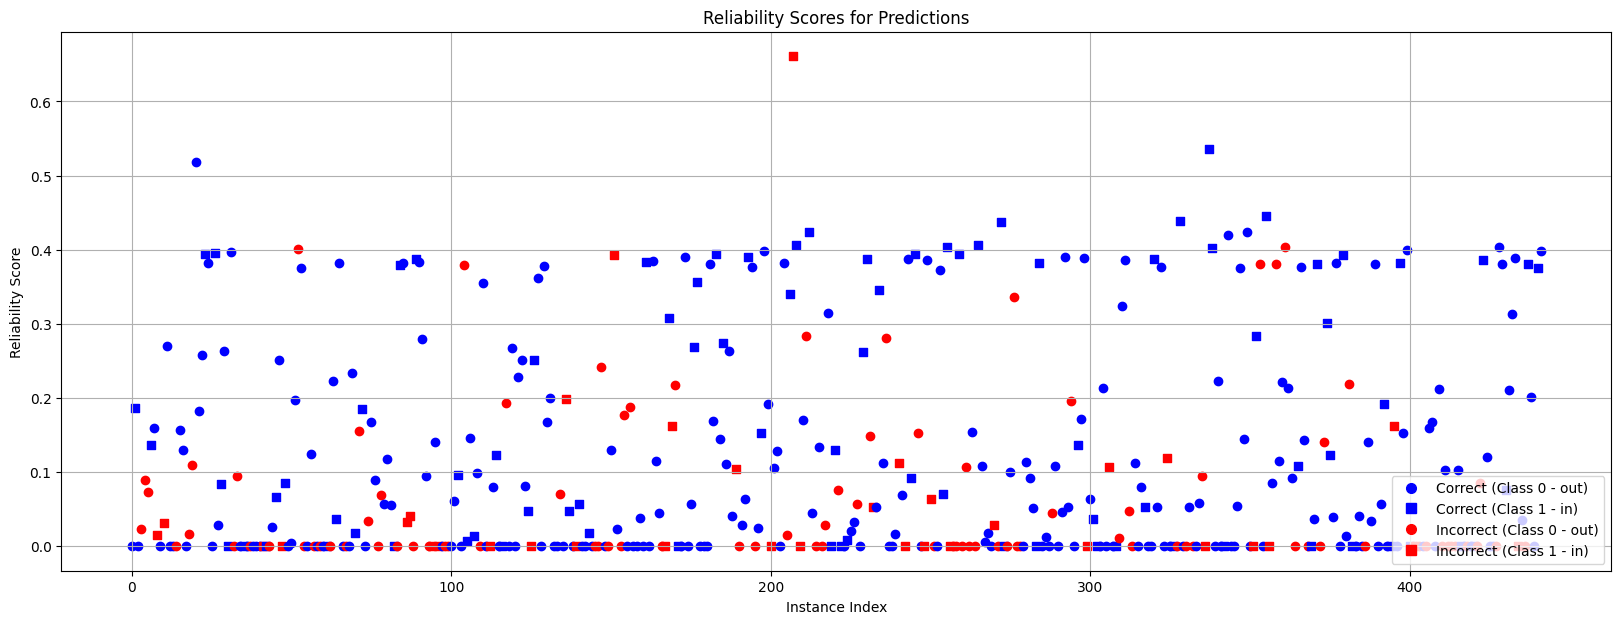

In [5]:
###########################################################
# Results
###########################################################
visualizer = ReliabilityVisualizer(results_df=results_df)

visualizer.plot_reliability_scores((20,7))

### 10

In [6]:
reliability_table_10_df = visualizer.get_reliability_table_10()
print(reliability_table_10_df)

    Reliability  Correct (0)  Incorrect (0)  Correct (1)  Incorrect (1)
0  [0.00, 0.10]          135             72           39             25
1  ]0.10, 0.20]           38             10           10              7
2  ]0.20, 0.30]           19              5            5              0
3  ]0.30, 0.40]           33              4           23              1
4  ]0.40, 0.50]            3              2            8              0
5  ]0.50, 0.60]            1              0            1              0
6  ]0.60, 0.70]            0              0            0              1
7  ]0.70, 0.80]            0              0            0              0
8  ]0.80, 0.90]            0              0            0              0
9  ]0.90, 1.00]            0              0            0              0


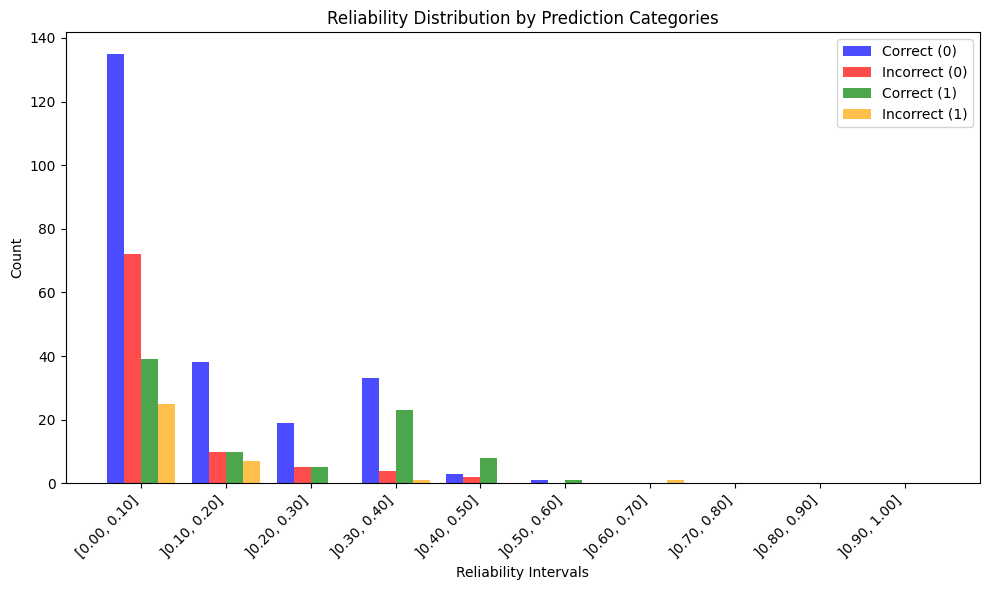

In [7]:
visualizer.plot_table_graph(reliability_table_10_df)

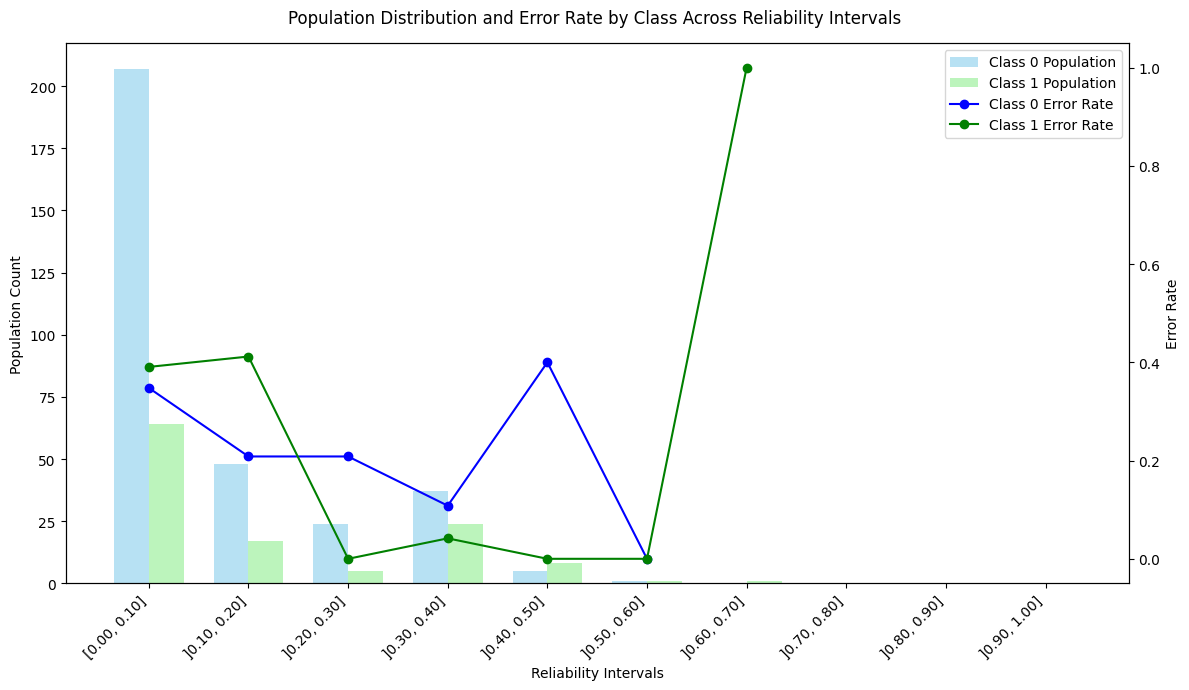

In [8]:
visualizer.plot_population_and_error_rate_by_class(reliability_table_10_df)

Sample reliability interval assignment:
   reliability_score reliability_interval
0           0.000000        (-0.001, 0.1]
1           0.186351           (0.1, 0.2]
2           0.000000        (-0.001, 0.1]
3           0.022768        (-0.001, 0.1]
4           0.089732        (-0.001, 0.1]
5           0.073458        (-0.001, 0.1]
6           0.137116           (0.1, 0.2]
7           0.159748           (0.1, 0.2]
8           0.014980        (-0.001, 0.1]
9           0.000000        (-0.001, 0.1]


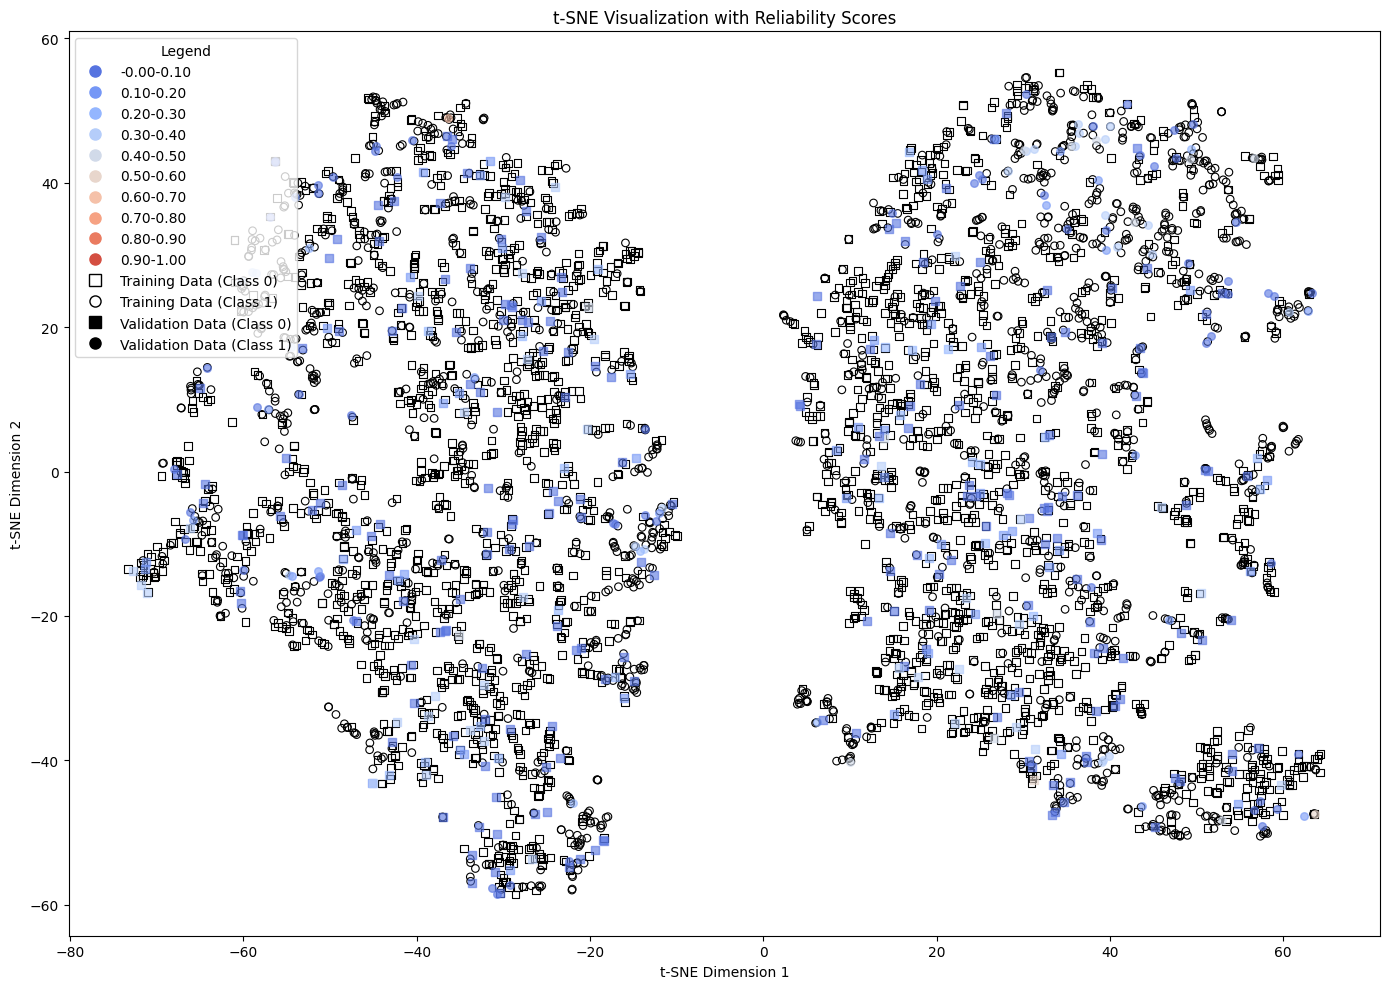

In [9]:
visualizer.plot_tsne_with_reliability(
    X_train_preprocessed, validation_data, y_train, pipeline
)